<h4>Assignment 1 Problem 1: Projectile</h4>

In [2]:
rr=0.0075

0.0075

In [3]:
g=9.81

9.81

In [66]:
psi=sqrt(rr/g)

0.02765006318046655

In [71]:
C1=atan(90*sqrt(rr/g))

1.1886982195217906

In [72]:
v1(t)=sqrt(g/rr)*tan(-sqrt(rr*g)*t+C1)

v1 (generic function with 1 method)

In [64]:
using Roots

In [69]:
find_zero(v1,5)

4.382344116304748

I solved the differential equation
$$
\frac{dv}{dt}=-g-\rho{}v^{2}
$$
for the time when the projectile ascends. The solution (after separation) is
$$
v=\frac{1}{\psi}\tan(C_{1}-g\psi{}t)
$$.
with $\psi=\sqrt{\frac{\rho}{g}}$ and $C_{1}=\arctan(90\psi)$ (to make $v(0)=90$).

When the projectile descends, the differential equation is
$$
\frac{dv}{dt}=-g+\rho{}v^{2}
$$
The solution (after separation) is
$$
v=\frac{1}{\psi}\tanh(C_{2}-g\psi{}t)
$$
with $\psi=\sqrt{\frac{\rho}{g}}$ and $C_{2}=g\psi\cdot{}4.38$ (to make $v(4.38)=0$).

The position functions are
$$
-\frac{1}{g\psi^{2}}\ln\left(\sec(C_{1}-g\psi{}t)\right)+C_{3}
$$
for ascending and
$$
-\frac{1}{g\psi^{2}}\ln\left(\cosh(C_{2}-g\psi{}t)\right)+C_{4}
$$
for descending (see leigheex3 in desmos for a nice graph).

In [75]:
C2=g*psi*4.382344116304748

1.1886982195217906

In [76]:
v2(t)=(1/0.02765006318046655)*tanh(C2-g*0.02765006318046655*t)

v2 (generic function with 1 method)

In [86]:
C3=(1/(g*psi^2))*log(sec(C1))

131.53740920808423

In [97]:
s1(t)=(-1/(g*psi^2))*log(sec(C1-g*psi*t))+C3

s1 (generic function with 1 method)

In [98]:
s1(4.382344116304748)

131.53740920808423

In [96]:
C4=(1/(g*psi^2))*log(sec(C2-g*psi*4.382344116304748))+131.53740920808423

131.53740920808423

In [99]:
s2(t)=(-1/(g*psi^2))*log(cosh(C2-g*psi*t))+C4

s2 (generic function with 1 method)

In [100]:
find_zero(s2,10)

10.439380910012924

The projectile reaches its maximum height of $131.54$ metres at $t=4.3823$ seconds. It returns to the ground at $10.4394$ seconds.

In [49]:
using DifferentialEquations

In [50]:
f(u,p,t)=-9.81-0.0075*u^2

f (generic function with 2 methods)

In [51]:
u0=90

90

In [52]:
tspan=(0,10)

(0, 10)

In [53]:
prob = ODEProblem(f,u0,tspan)

ODEProblem with uType Int64 and tType Int64. In-place: false
timespan: (0, 10)
u0: 90

In [54]:
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 84-element Vector{Float64}:
  0.0
  0.00991893842371848
  0.04384029292800987
  0.10128837914197608
  0.16631811102450267
  0.2408343626394095
  0.3230155595563942
  0.41294138890884696
  0.5093396143919415
  0.6118985827185073
  0.7198768047823009
  0.8329491939125794
  0.9506972205361401
  ⋮
  9.747608989725391
  9.784366761281742
  9.817809726552234
  9.848261230332541
  9.876009645491544
  9.901312045048615
  9.924398283255874
  9.94547416074617
  9.964724347292075
  9.982314841254874
  9.99839513661803
 10.0
u: 84-element Vector{Float64}:
   90.0
   89.3047727706604
   86.99540002054786
   83.30887803654461
   79.44264907254993
   75.3650136328077
   71.24850558556076
   67.13926778034762
   63.12838494683145
   59.24449339968922
   55.52038492011909
   51.96340176580016
   48.57792984779848
    ⋮
 -311.77876448184867
 -341.4923602457309
 -373.8423718300669
 -409.06834885265556
 -447.43231054306875
 -489

In [55]:
using Plots

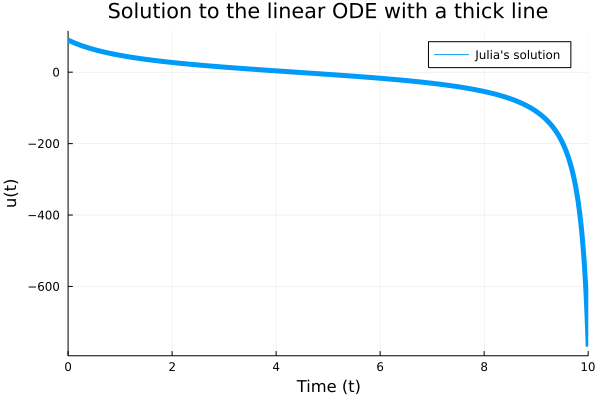

In [57]:
Plots.plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t)",label="Julia's solution")